<a href="https://colab.research.google.com/github/kinaya18/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/blob/main/The%20Fundamentals%20of%20Machine%20Learning/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1: The Machine Learning Landscape**

**Apa Itu Machine Learning?**

Machine Learning adalah seni dan ilmu membuat komputer belajar dari data tanpa diprogram secara eksplisit.


*   Arthur Samuel (1959): ML adalah bidang studi yang memberi komputer kemampuan untuk belajar tanpa diprogram secara eksplisit.
*   Tom Mitchell (1997): Suatu program dikatakan belajar dari pengalaman E terhadap tugas T dan ukuran kinerja P jika kinerjanya terhadap T meningkat seiring bertambahnya E.

Machine Learning (ML) membuat program bisa belajar dari pengalaman. Misalnya, sebuah program spam filter bisa belajar dari email-email yang sudah ditandai sebagai spam dan bukan spam oleh pengguna. Semakin banyak contoh, semakin akurat prediksinya.

ML berguna ketika aturan terlalu kompleks untuk diprogram manual, data sangat besar, atau lingkungan berubah dengan cepat.

**Mengapa Menggunakan Machine Learning?
ML berguna ketika :**
- Aturan terlalu kompleks untuk diprogram manual
- Lingkungan berubah cepat (misal: spam baru terus muncul)
- Data besar & kompleks, dan kita ingin menggali pola dari data

**Jenis-Jenis Machine Learning**


1.   Supervised Learning :

  Model dilatih dengan data yang memiliki label. Contohnya: klasifikasi email sebagai spam atau bukan. Algoritma : Linear Regression, Decision Tree, Neural Networks, dll.
  
2.   Unsupervised Learning :

  Data tidak memiliki label. Model harus menemukan pola sendiri, seperti pengelompokan pelanggan dengan K-Means. Contoh: clustering pelanggan, reduksi dimensi (PCA). Algoritma: K-Means, DBSCAN, PCA, t-SNE

3. Semisupervised Learning :

  Kombinasi data berlabel dan tidak berlabel. Berguna saat pelabelan data mahal atau sulit. Contoh: Google Photos (clustering wajah, kemudian diberi nama oleh user)
4. Reinforcement Learning :

  Agen belajar melalui percobaan, mendapatkan reward atau penalti. Contoh: AI bermain catur atau mengontrol robot.



**Cara Model Belajar**


*   Batch Learning : Model dilatih sekaligus dengan seluruh data dan tidak berubah setelah itu. Batch learning belajar dari semua data sekaligus (offline)dan harus dilatih ulang untuk data baru.
*   Online Learning :
Model dilatih secara bertahap dari data baru. Berguna untuk data stream atau sistem adaptif. Cocok untuk data streaming (misal: stock prediction)



**Instance-Based vs Model-Based Learning**
- Instance-based : Membandingkan data baru dengan data yang pernah dilihat (contoh: KNN).
- Model-based : Mempelajari hubungan umum dari data dan membuat model (contoh: Linear Regression).

**Tantangan dalam ML**
- **Data tidak cukup atau berkualitas buruk** : Jumlah data yang kecil bisa membuat model sulit mengenali pola. Data yang tidak bersih (berisi noise, nilai hilang, duplikat) juga membuat model tidak akurat. Solusinya adalah mengumpulkan data lebih banyak, melakukan _data cleaning_, dan menggunakan teknik seperti augmentasi data.

- **Overfitting** : Model terlalu cocok dengan data pelatihan hingga tidak bisa generalisasi ke data baru. Solusinya antara lain menggunakan regularisasi (seperti L1/L2), dropout, mengurangi kompleksitas model, dan memperbanyak data.

- **Underfitting** : Model terlalu sederhana sehingga gagal menangkap pola dari data. Ini bisa diatasi dengan menggunakan model yang lebih kompleks, menambahkan fitur relevan, atau melatih lebih lama.

- **Mismatch data antara pelatihan dan realita** : Jika distribusi data pelatihan tidak sama dengan data nyata (misalnya pelatihan dari negara A, tapi digunakan di negara B), hasilnya bisa buruk. Untuk itu, kita perlu _cross-validation_, domain adaptation, atau mengumpulkan data yang representatif.

**Workflow Proyek Machine Learning**
1. **Memahami masalah** : Kita harus tahu tujuan bisnis atau teknis yang ingin diselesaikan. Misalnya: "Apakah kita ingin memprediksi churn pelanggan atau mendeteksi penipuan?" Tanpa pemahaman masalah yang jelas, solusi ML bisa salah arah.

2. **Mengumpulkan data** : Kita harus mencari data yang relevan dan representatif. Sumber data bisa dari internal perusahaan, open data, scraping, atau API. Penting juga memastikan datanya legal untuk digunakan.

3. **Menyiapkan data** : Ini mencakup pembersihan data (menghapus nilai kosong, duplikat), transformasi (scaling, encoding), dan pembagian data (train/test split). Kualitas data di sini sangat berpengaruh pada hasil akhir.

4. **Memilih dan melatih model** : Berdasarkan jenis tugas (klasifikasi, regresi, clustering), kita pilih model yang cocok (misalnya Logistic Regression, Random Forest, atau Neural Network), lalu latih model menggunakan data.

5. **Evaluasi dan tuning** : Model dievaluasi menggunakan metrik seperti akurasi, RMSE, F1-score, dsb. Kemudian dilakukan hyperparameter tuning (GridSearch, RandomizedSearch) untuk meningkatkan performa.

6. **Deployment ke produksi** : Model yang sudah bagus di-deploy ke sistem nyata, diintegrasikan ke dalam aplikasi atau API. Perlu juga monitoring agar bisa mendeteksi penurunan performa akibat perubahan data (data drift).

**Contoh Aplikasi ML**
- Deteksi penipuan kartu kredit
- Prediksi pendapatan
- Sistem rekomendasi
- Pengelompokan pelanggan
- Chatbot dan NLP

**Studi Kasus: Prediksi Life Satisfaction Berdasarkan GDP**
Kita akan membandingkan dua pendekatan: Linear Regression dan K-Nearest Neighbors (KNN). Tujuannya adalah memprediksi tingkat kepuasan hidup sebuah negara berdasarkan GDP per kapita-nya.

In [ ]:
### Bagian 1 - Import Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
### Bagian 2 - Load dan Persiapan Data
# Simulasi data
data = {
    "Country": ["Korea", "France", "Australia", "United States", "Germany", "Sweden", "Japan", "United Kingdom", "Italy", "Cyprus"],
    "GDP per capita": [20496, 37675, 42038, 55805, 40996, 49866, 32485, 43770, 29866, 22587],
    "Life satisfaction": [5.8, 6.5, 7.3, 7.2, 6.7, 7.2, 5.9, 6.8, 6.0, 6.2]
}
df = pd.DataFrame(data)
X = np.c_[df["GDP per capita"]]
y = np.c_[df["Life satisfaction"]]

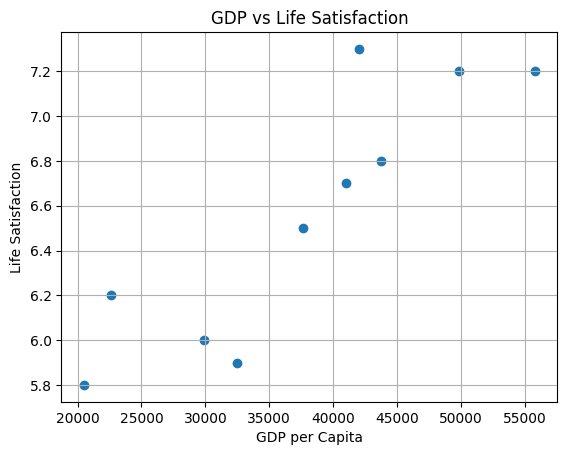

In [ ]:
### Bagian 3 - Visualisasi
plt.scatter(df["GDP per capita"], df["Life satisfaction"])
plt.xlabel("GDP per Capita")
plt.ylabel("Life Satisfaction")
plt.title("GDP vs Life Satisfaction")
plt.grid(True)
plt.show()

In [ ]:
### Bagian 4 - Model Linear Regression
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(X, y)

gdp_test = [[22587]]  # GDP per capita Cyprus
prediction_lin = lin_model.predict(gdp_test)
print("Linear Regression Prediction:", prediction_lin[0][0])

Linear Regression Prediction: 5.900940270207974


In [ ]:
### Bagian 5 - Model KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)
prediction_knn = knn_model.predict(gdp_test)
print("KNN Regression Prediction:", prediction_knn[0][0])

KNN Regression Prediction: 6.0


**Penjelasan Model**

Linear Regression membuat garis lurus terbaik yang mendekati data. KNN bekerja dengan melihat 3 negara dengan GDP terdekat, lalu menghitung rata-rata nilai kepuasan hidup mereka.